In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
%matplotlib inline

In [77]:
df_appliances = pd.read_csv('credit_card/appliances.csv')
df_department = pd.read_csv('credit_card/departmentstore.csv')
df_drug = pd.read_csv('credit_card/drug.csv')
df_fashion = pd.read_csv('credit_card/fashion.csv')
df_flower = pd.read_csv('credit_card/flowershop.csv')
df_food = pd.read_csv('credit_card/food.csv')
df_home = pd.read_csv('credit_card/home_goods.csv')
df_luxury = pd.read_csv('credit_card/luxury.csv')
df_reuse = pd.read_csv('credit_card/reuse.csv')
df_sport = pd.read_csv('credit_card/sport.csv')
df_super = pd.read_csv('credit_card/supermarket.csv')

In [78]:
df_appliances.head()

,month,アメリカ合衆国,オーストラリア,台湾,中華人民共和国,タイ,香港,大韓民国,シンガポール
0,Aug-12,49171922,26340071,94590771,156240871,60798441,66252524,83092041,27492894
1,Sep-12,55425553,36140241,97834288,84001724,88439712,75978641,87631229,29091741
2,Oct-12,56629758,40049371,103367812,69291641,157488912,78040706,93480094,53054012
3,Nov-12,47490087,41192971,163181941,59520106,116607376,82751224,121145265,63097565
4,Dec-12,63525540,58901488,155653129,92870059,177378524,120890276,122495218,99181071


In [79]:
length = df_appliances.shape[0]

In [80]:
df_drug = df_drug.dropna()
df_flower['タイ'][10] = df_flower['タイ'].median()

/Users/shionhonda/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
# 1月あたり旅行者
tourlist_dic={}
for year in range(2012,2017):
    with open("tourists_number/FY%d"%year,"r",encoding="utf-8") as f:
        dic = json.load(f)
    for countryData in dic["result"]["changes"]:
        country = countryData["countryName"]
        for i in range(len(countryData["data"])):
            num_qt = countryData["data"][i]
            if num_qt["year"] == year:
                if year == 2012:
                    if num_qt["quarter"] > 2:
                        if num_qt["quarter"] == 3:
                            iteration = 2
                        elif num_qt["quarter"] == 4:
                            iteration = 3
                        num_m = num_qt["value"]/3
                        for i in range(iteration):
                            try:
                                tourlist_dic[country].append(num_m)
                            except:
                                tourlist_dic[country] = [num_m]
                elif year == 2016:
                    if num_qt["quarter"] == 1:
                        num_m = num_qt["value"]/3
                        for i in range(3):
                            try:
                                tourlist_dic[country].append(num_m)
                            except:
                                tourlist_dic[country] = [num_m]
                else:
                    num_m = num_qt["value"]/3
                    for i in range(3):
                        try:
                            tourlist_dic[country].append(num_m)
                        except:
                            tourlist_dic[country] = [num_m]
for k,v in tourlist_dic.items():
    tourlist_dic[k] = np.array(v)


In [114]:
tourlist_dic['タイ']

array([  7572.66666667,   7572.66666667,  15862.        ,  15862.        ,
        15862.        ,  14628.        ,  14628.        ,  14628.        ,
        21648.66666667,  21648.66666667,  21648.66666667,  16792.33333333,
        16792.33333333,  16792.33333333,  32071.33333333,  32071.33333333,
        32071.33333333,  20474.33333333,  20474.33333333,  20474.33333333,
        38818.33333333,  38818.33333333,  38818.33333333,  18763.66666667,
        18763.66666667,  18763.66666667,  43885.66666667,  43885.66666667,
        43885.66666667,  35436.        ,  35436.        ,  35436.        ,
        51986.        ,  51986.        ,  51986.        ,  19679.66666667,
        19679.66666667,  19679.66666667,  46552.66666667,  46552.66666667,
        46552.66666667,  43279.66666667,  43279.66666667,  43279.66666667])

In [82]:
c_list = ['アメリカ合衆国', 'オーストラリア', '中華人民共和国', '台湾', '大韓民国', '香港', 'タイ', 'シンガポール']
appliances_sum = np.zeros(length)
department_sum = np.zeros(length)
drug_sum = np.zeros(length)
fashion_sum = np.zeros(length)
flower_sum = np.zeros(length)
food_sum = np.zeros(length)
home_sum = np.zeros(length)
luxury_sum = np.zeros(length)
reuse_sum = np.zeros(length)
sport_sum = np.zeros(length)
super_sum = np.zeros(length)
tourist_sum = np.zeros(length)
for c in c_list:
    appliances_sum += df_appliances[c].values
    department_sum += df_department[c].values
    drug_sum += df_drug[c].values
    fashion_sum += df_fashion[c].values
    flower_sum += df_flower[c].values
    food_sum += df_food[c].values
    home_sum += df_home[c].values
    luxury_sum += df_luxury[c].values
    reuse_sum += df_reuse[c].values
    sport_sum += df_sport[c].values
    super_sum += df_super[c].values
    tourist_sum += tourlist_dic[c]

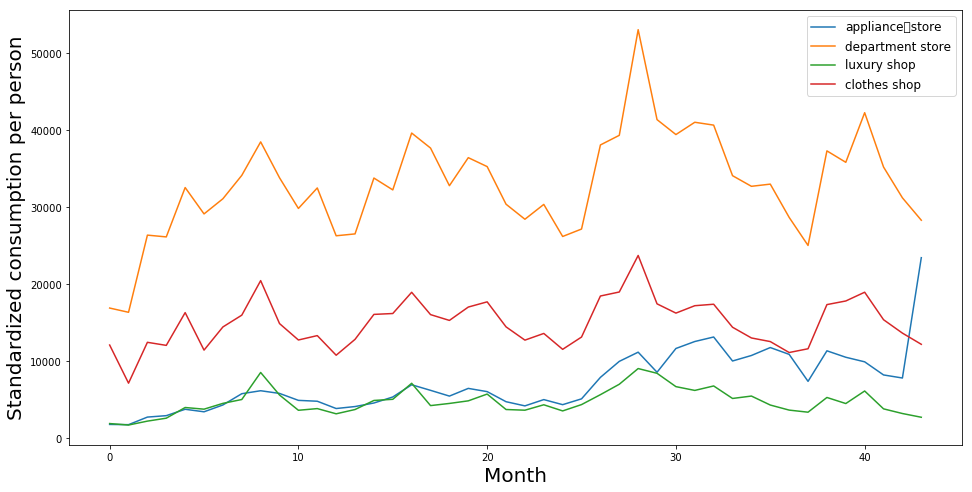

In [83]:
plt.figure(figsize=(16,8))
plt.plot(appliances_sum/tourist_sum, label="appliance　store")
plt.plot(department_sum/tourist_sum, label="department store")
plt.plot(luxury_sum/tourist_sum, label="luxury shop")
plt.plot(fashion_sum/tourist_sum, label="clothes shop")

plt.xlabel("Month", fontsize=20)
plt.ylabel("Standardized consumption per person", fontsize=20)
plt.legend(fontsize=12)

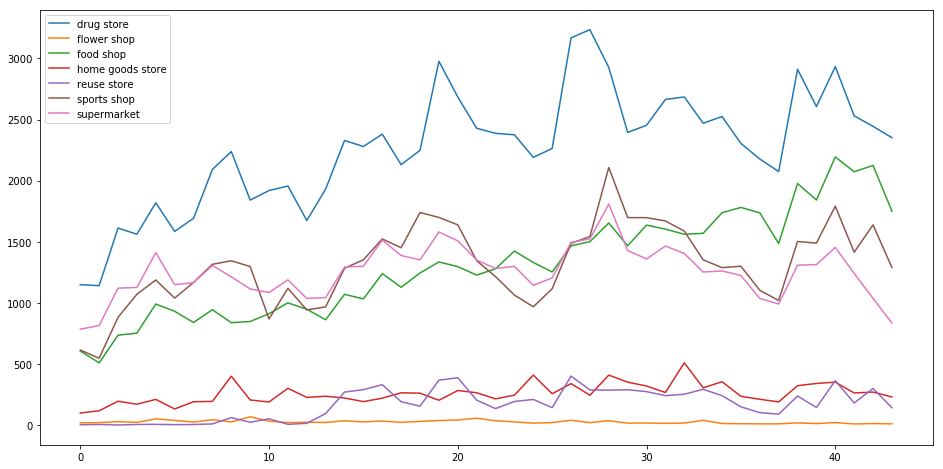

In [84]:
plt.figure(figsize=(16,8))
plt.plot(drug_sum/tourist_sum, label="drug store")
plt.plot(flower_sum/tourist_sum, label="flower shop")
plt.plot(food_sum/tourist_sum, label="food shop")
plt.plot(home_sum/tourist_sum, label="home goods store")

plt.plot(reuse_sum/tourist_sum, label="reuse store")
plt.plot(sport_sum/tourist_sum, label="sports shop")
plt.plot(super_sum/tourist_sum, label="supermarket")
plt.legend()

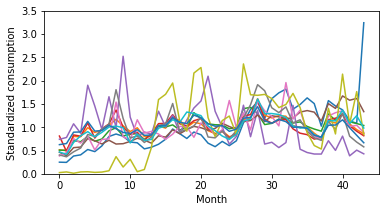

In [123]:
plt.figure(figsize=(6,3))
plt.ylim([0, 3.5])
plt.plot(appliances_mean, label="appliance store")
plt.plot(department_mean, label="department store")
plt.plot(drug_mean, label="drug store")
plt.plot(fashion_mean, label="clothes shop")
plt.plot(flower_mean, label="flower shop")
plt.plot(food_mean, label="food shop")
plt.plot(home_mean, label="home goods store")
plt.plot(luxury_mean, label="luxury shop")
plt.plot(reuse_mean, label="reuse store")
plt.plot(sport_mean, label="sports shop")
plt.plot(super_mean, label="supermarket")
plt.xlabel("Month", fontsize=10)
plt.ylabel("Standardized consumption", fontsize=10)
#plt.legend(fontsize=12)

In [86]:
appliances_mean = appliances_sum/tourist_sum
department_mean = department_sum/tourist_sum
drug_mean = drug_sum/tourist_sum
fashion_mean = fashion_sum/tourist_sum
flower_mean = flower_sum/tourist_sum
food_mean = food_sum/tourist_sum
home_mean = home_sum/tourist_sum
luxury_mean = luxury_sum/tourist_sum
reuse_mean = reuse_sum/tourist_sum
sport_mean = sport_sum/tourist_sum
super_mean = super_sum/tourist_sum

In [87]:
appliances_mean /= appliances_mean.mean()
department_mean /= department_mean.mean()
drug_mean /= drug_mean.mean()
fashion_mean /= fashion_mean.mean()
flower_mean /= flower_mean.mean()
food_mean /= food_mean.mean()
home_mean /= home_mean.mean()
luxury_mean /= luxury_mean.mean()
reuse_mean /= reuse_mean.mean()
sport_mean /= sport_mean.mean()
super_mean /= super_mean.mean()

In [88]:
array = np.vstack((appliances_mean, department_mean, drug_mean, fashion_mean, flower_mean, food_mean, home_mean, luxury_mean, reuse_mean, sport_mean, super_mean))

In [89]:
km = KMeans(n_clusters=4)
pred = km.fit_predict(array)

In [90]:
df = pd.DataFrame(array)
df['cluster_id']=pred
df['name'] = ["appliances", "department", "drug", "fashion", "flower", "food", "home", "luxury","reuse", "sport", "super"]
df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,cluster_id,name
0,0.249406,0.245233,0.381292,0.406804,0.521477,0.476173,0.598916,0.800796,0.854124,0.806018,...,1.506733,1.022595,1.570512,1.454965,1.372888,1.137522,1.082557,3.242040,2,appliances
1,0.514179,0.497410,0.801934,0.794940,0.989710,0.885678,0.945538,1.037768,1.169958,1.028200,...,0.871925,0.761218,1.134443,1.089315,1.285138,1.070732,0.949158,0.860731,1,department
2,0.507212,0.503732,0.711167,0.689224,0.802550,0.699252,0.746717,0.922878,0.987169,0.812400,...,0.960454,0.915094,1.284059,1.149731,1.293754,1.116066,1.078306,1.037240,1,drug
3,0.810121,0.479086,0.833744,0.807134,1.091745,0.766043,0.967155,1.069489,1.369350,0.996393,...,0.745128,0.777812,1.161200,1.192672,1.268724,1.029989,0.913623,0.816439,1,fashion
4,0.740460,0.779520,1.072831,0.870756,1.901311,1.453223,0.951684,1.654067,0.987090,2.522006,...,0.424614,0.424016,0.709601,0.502884,0.808573,0.385701,0.507892,0.428269,3,flower
5,0.462411,0.389008,0.561144,0.573865,0.755100,0.709944,0.640062,0.720007,0.638966,0.646268,...,1.323180,1.132400,1.505708,1.403296,1.671309,1.579014,1.618378,1.333746,1,food
6,0.383503,0.454519,0.754382,0.659949,0.811681,0.511833,0.737278,0.749696,1.538689,0.793609,...,0.815077,0.732067,1.240926,1.311251,1.351613,1.012892,1.041051,0.888069,1,home
7,0.405010,0.364503,0.471711,0.552306,0.844717,0.799399,0.958435,1.064241,1.805201,1.187265,...,0.773796,0.716499,1.120115,0.953670,1.297609,0.808041,0.680093,0.577685,1,luxury
8,0.026380,0.039955,0.012022,0.039749,0.044159,0.030555,0.037209,0.065213,0.368338,0.145198,...,0.606836,0.531046,1.405280,0.855483,2.139097,1.069723,1.764134,0.841260,0,reuse
9,0.468553,0.417825,0.672447,0.816239,0.905006,0.792113,0.889584,1.002829,1.024538,0.988905,...,0.840603,0.777464,1.144721,1.134494,1.364655,1.078204,1.248130,0.982613,1,sport


In [116]:
appliances_th = df_appliances['タイ']/tourlist_dic['タイ']
department_th = df_department['タイ']/tourlist_dic['タイ']
drug_th = df_drug['タイ']/tourlist_dic['タイ']
fashion_th = df_fashion['タイ']/tourlist_dic['タイ']
flower_th = df_flower['タイ']/tourlist_dic['タイ']
food_th = df_food['タイ']/tourlist_dic['タイ']
home_th = df_home['タイ']/tourlist_dic['タイ']
luxury_th = df_luxury['タイ']/tourlist_dic['タイ']
reuse_th = df_reuse['タイ']/tourlist_dic['タイ']
sport_th = df_sport['タイ']/tourlist_dic['タイ']
super_th = df_super['タイ']/tourlist_dic['タイ']

In [118]:
array_th = np.vstack((appliances_th, department_th, drug_th, fashion_th, flower_th, food_th, home_th, luxury_th, reuse_th, sport_th, super_th))
km_th = KMeans(n_clusters=4)
pred_th = km_th.fit_predict(array_th)
df_th = pd.DataFrame(array_th)
df_th['cluster_id']=pred_th
df_th['name'] = ["appliances", "department", "drug", "fashion", "flower", "food", "home", "luxury","reuse", "sport", "super"]
df_th

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,cluster_id,name
0,8028.669909,11678.806937,9928.691968,7351.366536,11182.607742,12665.463084,16645.537941,24970.194969,24992.298294,19760.023635,...,20455.980979,15316.255001,15075.514750,13754.657549,17613.118618,15077.713260,9959.544128,12469.502253,0,appliances
1,87904.863280,96785.707369,76877.704073,52114.882171,84792.449061,75402.035548,97537.521534,115994.280900,158993.378484,112738.529840,...,98235.617338,85513.917106,78452.878825,65823.085129,87692.859364,76354.141806,64408.012438,74777.388512,2,department
2,5765.056739,7746.221454,5587.042681,4571.734018,5281.359791,3932.538693,4976.271944,9373.062141,10202.710375,6619.176008,...,5868.000610,5451.423991,5416.771821,4863.575993,5867.188940,4626.922673,3775.571569,5066.288511,1,drug
3,253225.189673,43906.339158,32666.043878,21452.390871,44562.053209,25449.250410,39811.634810,42548.904293,70407.660641,46056.977982,...,41877.555955,48615.509206,42656.554784,32318.296775,44510.716235,39035.305471,34747.498256,36820.458814,3,fashion
4,8.156308,14.843648,14.157042,3.634283,6.397113,12.560500,15.622710,3.166803,15.834416,9.357990,...,40.472230,9.475770,4.748171,5.384010,19.974581,6.436995,16.713715,6.158204,1,flower
5,361.909235,665.724007,463.577796,475.679233,568.751040,3730.211170,665.423298,636.961375,821.855003,531.724895,...,2202.152797,1152.670946,1292.662791,942.221985,1263.061285,1174.195735,1167.685056,1204.411125,1,food
6,221.800070,273.436174,232.388160,239.966776,341.552515,185.786710,192.304416,372.625034,989.993579,353.176485,...,1213.999221,422.839479,391.400414,384.959344,899.500372,437.566147,175.914571,293.689970,1,home
7,25220.685844,25030.746545,12687.129051,13389.290001,24719.593620,28052.041222,29044.235097,41499.781241,74897.566024,39661.724771,...,19543.538339,14414.022341,17162.203719,15320.923420,25986.796732,12173.459030,10632.977688,10365.492841,0,luxury
8,5.880227,43.826305,0.506178,14.759677,27.813390,0.000000,37.570960,55.574310,787.251301,101.004742,...,2295.909162,1284.142330,1552.921136,1270.400285,2577.564286,1915.126534,3143.298400,976.009897,1,reuse
9,3624.132450,2643.536931,1818.498865,2124.442819,2273.756399,2548.467460,2609.549357,3976.070481,5146.835125,3907.504619,...,6047.513152,5537.818849,4418.986402,3307.118991,4326.200590,3839.937176,4351.594998,5555.075363,1,sport


Distortion: 8.16


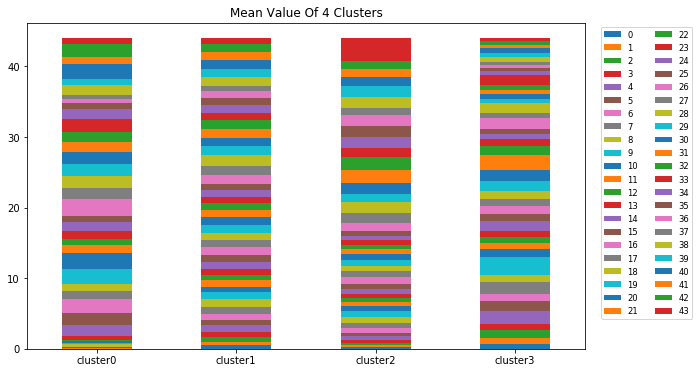

In [91]:
from matplotlib.font_manager import FontProperties

clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

fontP = FontProperties()
fontP.set_size('small')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value Of 4 Clusters", figsize=(10,6))
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
my_plot.legend(loc='upper right', ncol=2, prop=fontP, bbox_to_anchor=(1.2, 1))

print ('Distortion: %.2f'% km.inertia_)

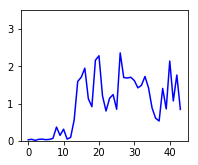

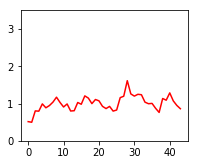

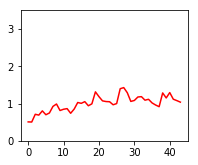

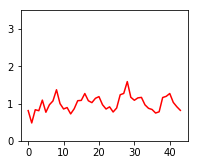

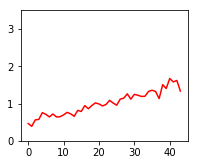

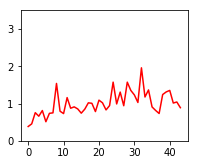

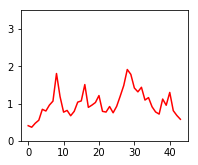

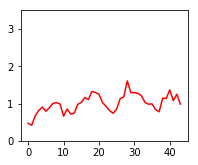

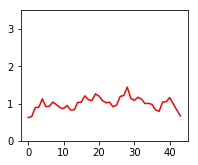

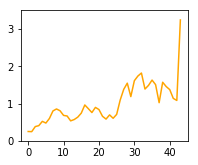

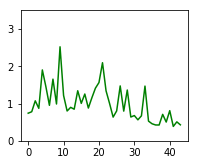

In [92]:

blues = ["blue", "cyan", "lightblue", "navy", "purple", "mediumpurple", "lightseagreen", "darkcyan"]
j = 0
plt.figure(figsize=(3,2.4))
plt.ylim([0, 3.5])
for i in range(11):
    
    if pred[i]==0:
        plt.plot(array[i], blues[j], label=df["name"][i]+"/cluster0")
        j+=1
for i in range(11):
    if pred[i]==1:
        plt.figure(figsize=(3,2.4))
        plt.ylim([0, 3.5])
        plt.plot(array[i], "red", label=df["name"][i]+"cluster1")
for i in range(11):
    if pred[i]==2:
        plt.figure(figsize=(3,2.4))
        plt.ylim([0, 3.5])
        plt.plot(array[i], "orange", label=df["name"][i]+"cluster2")
        
for i in range(11):
    if pred[i]==3:
        plt.figure(figsize=(3,2.4))
        plt.ylim([0, 3.5])
        plt.plot(array[i], "green", label=df["name"][i]+"cluster3")
#plt.legend()

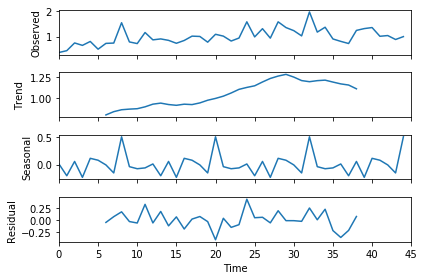

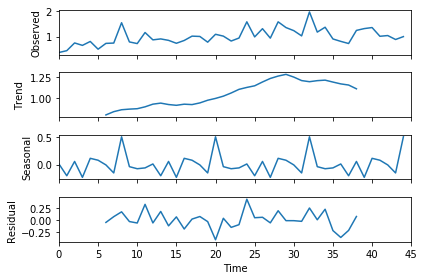

In [105]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(array_2[4], freq=12)
res.plot()

In [94]:
res.trend

array([        nan,         nan,         nan,         nan,         nan,
               nan,  0.0999237 ,  0.12454252,  0.212266  ,  0.34759538,
        0.49638429,  0.62146975,  0.703802  ,  0.82776759,  0.99484808,
        1.11870985,  1.18321455,  1.24921982,  1.34265372,  1.40218016,
        1.44581546,  1.47728805,  1.46587615,  1.47887042,  1.53200709,
        1.53024444,  1.46628541,  1.45492256,  1.50251295,  1.51765472,
        1.48053666,  1.44103915,  1.3881949 ,  1.31343424,  1.29733521,
        1.28984326,  1.26962824,  1.25171581,         nan,         nan,
               nan,         nan,         nan,         nan])

In [96]:
df_2 = df[df["cluster_id"]==1]
df_2 = df_2.drop("name", axis=1)
array_2 = df_2.values

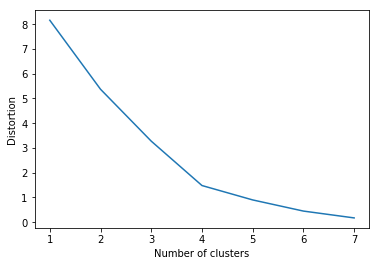

In [97]:
distortions = []

for i  in range(1,8):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(array_2)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,8),distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [98]:
km_2 = KMeans(n_clusters=4)
pred_2 = km_2.fit_predict(array_2)

In [99]:
df_2 = pd.DataFrame(array_2)
df_2['cluster_id']=pred_2
df_2['name'] = ["department", "drug", "fashion",  "food", "home", "luxury","sport", "super"]
df_2

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,cluster_id,name
0,0.514179,0.497410,0.801934,0.794940,0.989710,0.885678,0.945538,1.037768,1.169958,1.028200,...,0.761218,1.134443,1.089315,1.285138,1.070732,0.949158,0.860731,1.0,0,department
1,0.507212,0.503732,0.711167,0.689224,0.802550,0.699252,0.746717,0.922878,0.987169,0.812400,...,0.915094,1.284059,1.149731,1.293754,1.116066,1.078306,1.037240,1.0,0,drug
2,0.810121,0.479086,0.833744,0.807134,1.091745,0.766043,0.967155,1.069489,1.369350,0.996393,...,0.777812,1.161200,1.192672,1.268724,1.029989,0.913623,0.816439,1.0,0,fashion
3,0.462411,0.389008,0.561144,0.573865,0.755100,0.709944,0.640062,0.720007,0.638966,0.646268,...,1.132400,1.505708,1.403296,1.671309,1.579014,1.618378,1.333746,1.0,2,food
4,0.383503,0.454519,0.754382,0.659949,0.811681,0.511833,0.737278,0.749696,1.538689,0.793609,...,0.732067,1.240926,1.311251,1.351613,1.012892,1.041051,0.888069,1.0,3,home
5,0.405010,0.364503,0.471711,0.552306,0.844717,0.799399,0.958435,1.064241,1.805201,1.187265,...,0.716499,1.120115,0.953670,1.297609,0.808041,0.680093,0.577685,1.0,1,luxury
6,0.468553,0.417825,0.672447,0.816239,0.905006,0.792113,0.889584,1.002829,1.024538,0.988905,...,0.777464,1.144721,1.134494,1.364655,1.078204,1.248130,0.982613,1.0,0,sport
7,0.625915,0.649766,0.893216,0.897718,1.124977,0.915859,0.928691,1.040516,0.967036,0.888103,...,0.789548,1.042745,1.046566,1.158659,0.989531,0.826370,0.666122,1.0,0,super


Distortion: 0.17


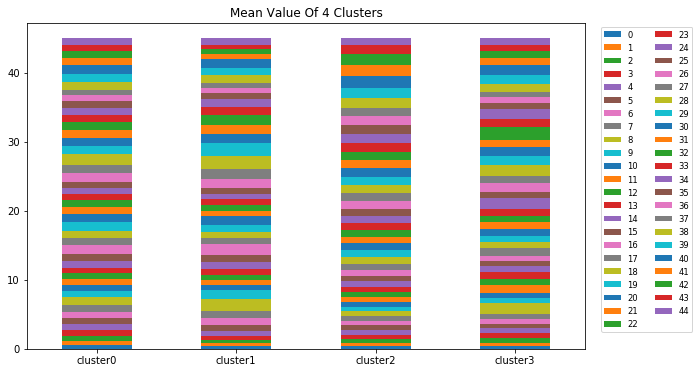

In [100]:
from matplotlib.font_manager import FontProperties

clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = df_2[df_2['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

fontP = FontProperties()
fontP.set_size('small')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value Of 4 Clusters", figsize=(10,6))
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
my_plot.legend(loc='upper right', ncol=2, prop=fontP, bbox_to_anchor=(1.2, 1))

print ('Distortion: %.2f'% km.inertia_)

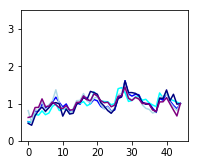

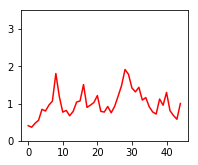

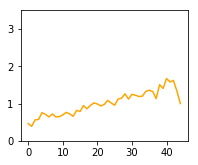

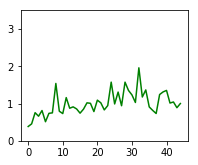

In [101]:
blues = ["blue", "cyan", "lightblue", "navy", "purple", "mediumpurple", "lightseagreen", "darkcyan"]
j = 0
plt.figure(figsize=(3,2.4))
plt.ylim([0, 3.5])
for i in range(8):
    
    if pred_2[i]==0:
        plt.plot(array_2[i], blues[j], label=df_2["name"][i]+"/cluster0")
        j+=1
for i in range(8):
    if pred_2[i]==1:
        plt.figure(figsize=(3,2.4))
        plt.ylim([0, 3.5])
        plt.plot(array_2[i], "red", label=df_2["name"][i]+"cluster1")
for i in range(8):
    if pred_2[i]==2:
        plt.figure(figsize=(3,2.4))
        plt.ylim([0, 3.5])
        plt.plot(array_2[i], "orange", label=df_2["name"][i]+"cluster2")
        
for i in range(8):
    if pred_2[i]==3:
        plt.figure(figsize=(3,2.4))
        plt.ylim([0, 3.5])
        plt.plot(array_2[i], "green", label=df_2["name"][i]+"cluster3")
#plt.legend()

In [12]:
km_3 = KMeans(n_clusters=7)
pred_3 = km_3.fit_predict(array)
df_3 = pd.DataFrame(array)
df_3['cluster_id']=pred_3
df_3['name'] = ["appliances", "department", "drug", "fashion", "flower", "food", "home", "luxury","reuse", "sport", "super"]
df_3

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,cluster_id,name
0,0.249406,0.245233,0.381292,0.406804,0.521477,0.476173,0.598916,0.800796,0.854124,0.806018,...,1.506733,1.022595,1.570512,1.454965,1.372888,1.137522,1.082557,3.242040,2,appliances
1,0.514179,0.497410,0.801934,0.794940,0.989710,0.885678,0.945538,1.037768,1.169958,1.028200,...,0.871925,0.761218,1.134443,1.089315,1.285138,1.070732,0.949158,0.860731,0,department
2,0.507212,0.503732,0.711167,0.689224,0.802550,0.699252,0.746717,0.922878,0.987169,0.812400,...,0.960454,0.915094,1.284059,1.149731,1.293754,1.116066,1.078306,1.037240,0,drug
3,0.810121,0.479086,0.833744,0.807134,1.091745,0.766043,0.967155,1.069489,1.369350,0.996393,...,0.745128,0.777812,1.161200,1.192672,1.268724,1.029989,0.913623,0.816439,0,fashion
4,0.740460,0.779520,1.072831,0.870756,1.901311,1.453223,0.951684,1.654067,0.987090,2.522006,...,0.424614,0.424016,0.709601,0.502884,0.808573,0.385701,0.507892,0.428269,3,flower
5,0.462411,0.389008,0.561144,0.573865,0.755100,0.709944,0.640062,0.720007,0.638966,0.646268,...,1.323180,1.132400,1.505708,1.403296,1.671309,1.579014,1.618378,1.333746,4,food
6,0.383503,0.454519,0.754382,0.659949,0.811681,0.511833,0.737278,0.749696,1.538689,0.793609,...,0.815077,0.732067,1.240926,1.311251,1.351613,1.012892,1.041051,0.888069,5,home
7,0.405010,0.364503,0.471711,0.552306,0.844717,0.799399,0.958435,1.064241,1.805201,1.187265,...,0.773796,0.716499,1.120115,0.953670,1.297609,0.808041,0.680093,0.577685,6,luxury
8,0.026380,0.039955,0.012022,0.039749,0.044159,0.030555,0.037209,0.065213,0.368338,0.145198,...,0.606836,0.531046,1.405280,0.855483,2.139097,1.069723,1.764134,0.841260,1,reuse
9,0.468553,0.417825,0.672447,0.816239,0.905006,0.792113,0.889584,1.002829,1.024538,0.988905,...,0.840603,0.777464,1.144721,1.134494,1.364655,1.078204,1.248130,0.982613,0,sport
